In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

In [31]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/heart/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
#Explanation of the columns namea

# Data contains;

#     age - age in years
#     sex - (1 = male; 0 = female)
#     cp - chest pain type
#     trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#     chol - serum cholestoral in mg/dl
#     fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#     restecg - resting electrocardiographic results
#     thalach - maximum heart rate achieved
#     exang - exercise induced angina (1 = yes; 0 = no)
#     oldpeak - ST depression induced by exercise relative to rest
#     slope - the slope of the peak exercise ST segment
#     ca - number of major vessels (0-3) colored by flourosopy
#     thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#     target - have disease or not (1=yes, 0=no)



In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [34]:
data.shape

(303, 14)

In [35]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [36]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

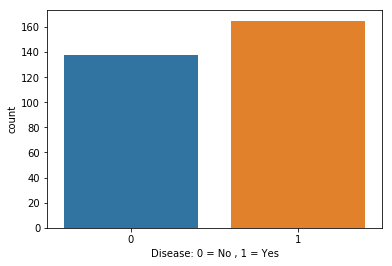

In [37]:
sns.countplot(x='target',data =data)
plt.xlabel("Disease: 0 = No , 1 = Yes")
plt.show()

In [38]:
countnoDisease = len(data[data.target== 0])
countyesDisease = len(data[data.target==1])
print("Percentage of Patients Have not Heart Disease: {:.2f}%".format((countnoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countyesDisease / (len(data.target))*100)))


Percentage of Patients Have not Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [39]:
#lets c in our data, how many are men and women
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

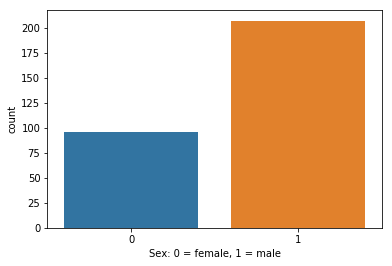

In [40]:
sns.countplot(x='sex',data =data)
plt.xlabel("Sex: 0 = female, 1 = male")
plt.show()

In [43]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%
